In [21]:
##basic libraries
import pandas as pd
import numpy as np
import pickle
import warnings
warnings.filterwarnings('ignore')


In [2]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [3]:
iris= pd.read_csv('IRIS.csv')
df= iris.copy()

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
##checking null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
target          0
dtype: int64

<AxesSubplot:>

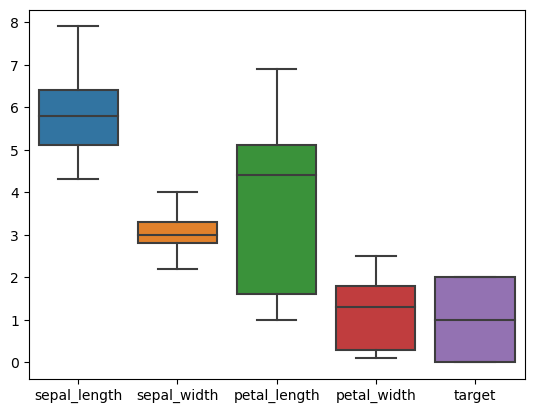

In [19]:
## visualising outlier
sns.boxplot(data=df)

In [7]:
##handling outlier(iqr techmique)

#forming quantile regions
q1=df['sepal_width'].quantile(0.25)
q3=df['sepal_width'].quantile(0.75)

#inter quartile region
iqr= q3-q1

#upper and lower limit
lower= q1-1.5*iqr
upper=q3+1.5*iqr

#finding indexes of outlier
ua= np.where(df['sepal_width']>=upper)[0].tolist()
la= np.where(df['sepal_width']<=lower)[0].tolist()

#extending both list and remove duplicates
la.extend(ua)
index= list(dict.fromkeys(la))

#removing indexes
df.drop(index, inplace= True,axis=0)


<AxesSubplot:>

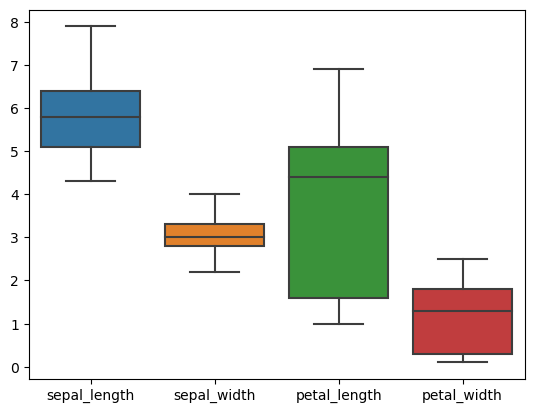

In [8]:
sns.boxplot(data=df)

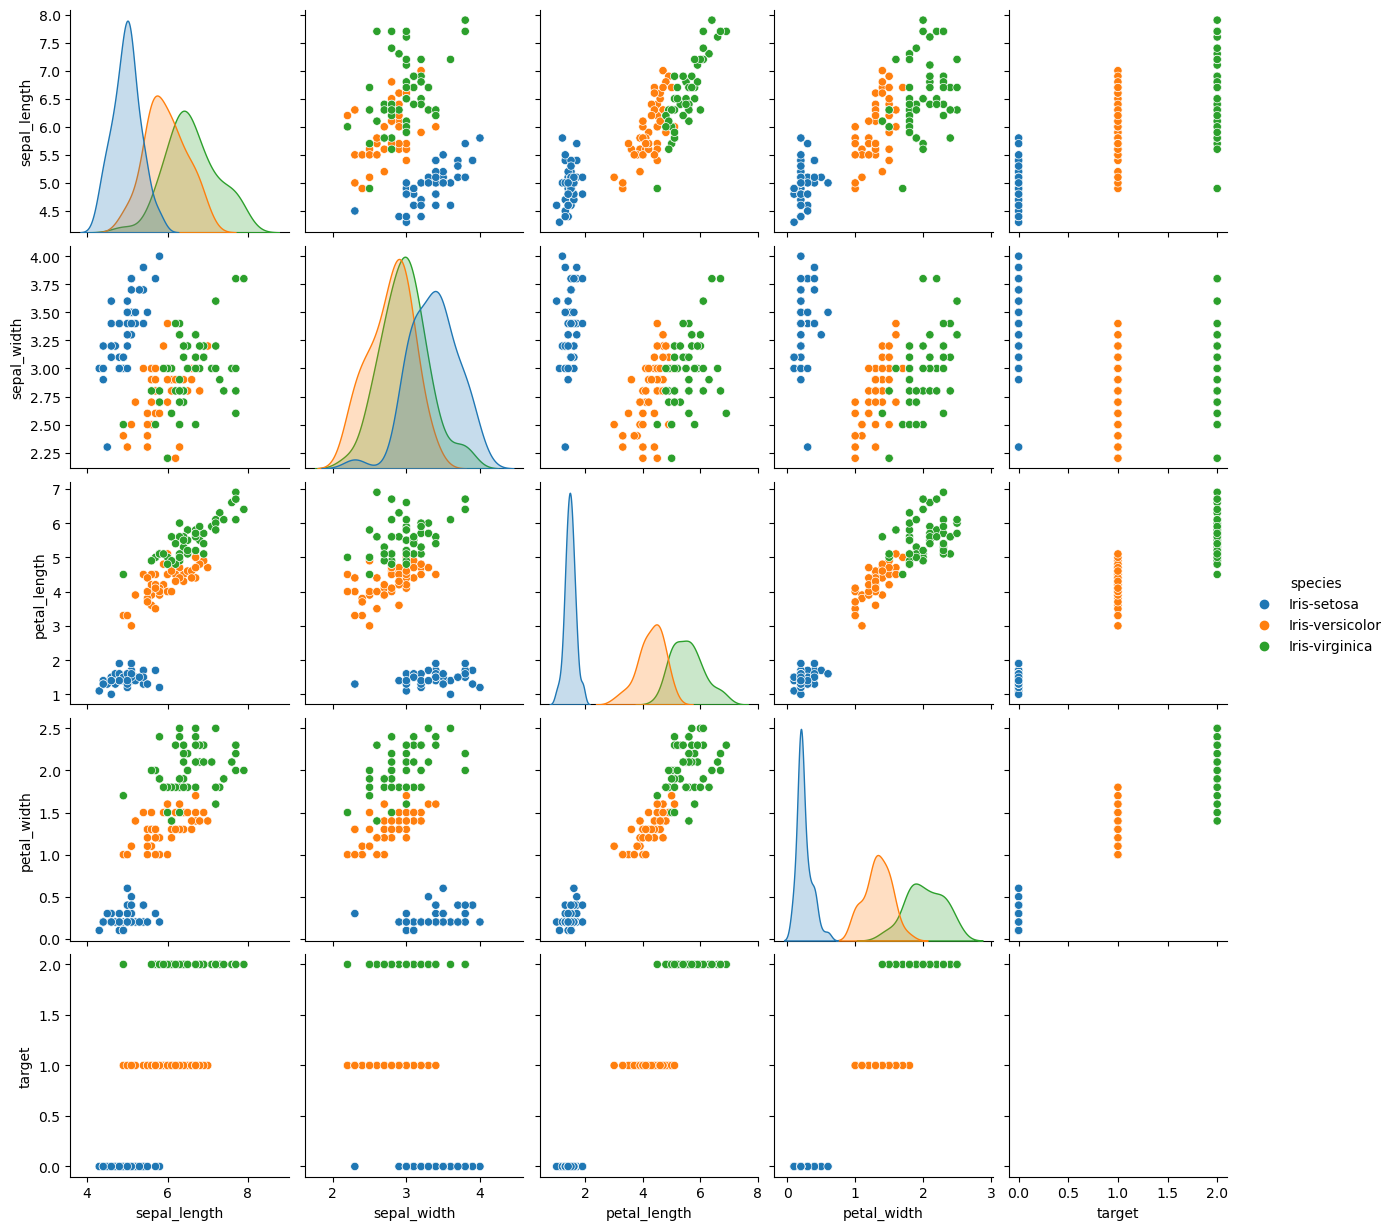

In [18]:
##visualising pattern
sns.pairplot(data = df , hue ='species')

In [10]:
##encoding species
e=LabelEncoder()
sf=e.fit_transform(df['species'])
df['target']=sf

In [11]:
##making x any y for decision tree
y= df[['target']]
x=df.iloc[:,:-2]

In [12]:
##Train test split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [17]:
##scaling the data

def scale(x_train, x_test):
    scaler= StandardScaler()

    x_train_sc= scaler.fit_transform(x_train)
    x_test_sc= scaler.transform(x_test)
    
    #saving model
    file = open(r'C:\Users\asus\OneDrive\Desktop\data science\iris\scaling_iris.pkl', 'wb')
    pickle.dump(scale, file)
    file.close()
    
    return x_train_sc, x_test_sc
## scaling the x_train and x_test
x_train_scale, x_test_scale = scale(x_train, x_test)

In [15]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train_scale, y_train)
y_pred = decision_tree.predict(x_test_scale)
acc_decision_tree = accuracy_score(y_test, y_pred)
acc_decision_tree

0.9591836734693877

In [16]:
#saving model
file = open(r'C:\Users\asus\OneDrive\Desktop\data science\iris\prediction_iris.pkl', 'wb')
pickle.dump(decision_tree, file)
file.close()
